In [1]:
import numpy as np
import matplotlib.pyplot as plt
from enum import Enum
from tqdm import tqdm

In [2]:
class Environment():
    def __init__(self):
        self.q = np.zeros(10)
    def step(self, action):
        reward = self.q[action]
        self.q += np.random.normal(loc=0, scale=0.01, size=10)
        return reward
    def reset(self):
        self.q = np.zeros(10)
    
class AgentType(Enum):
    CONSTANT_ALPHA = 0
    DECAYING_ALPHA = 1
    
class Agent():
    def __init__(self, epsilon, alpha, agent_type):
        self.agent_type = agent_type
        self.epsilon = epsilon
        self.alpha = alpha
        self.N_a = np.zeros(10)
        self.Q = np.zeros(10)
        self.rewards = None
        self.optimal_actions = None
    def compute_alpha(self, action):
        if self.agent_type == AgentType.CONSTANT_ALPHA:
            return self.alpha
        else:
            return self.alpha/self.N_a[action]
    def reset(self):
        self.Q = np.zeros(10)
        self.N_a = np.zeros(10)
        self.rewards = None
        self.optimal_actions = None
    def policy(self):
        if np.random.rand() > self.epsilon:
            return np.argmax(self.Q)
        else:
            return np.random.randint(10)
    def train(self, num_steps, env):
        self.step_to_average_reward = np.zeros(num_steps)
        self.rewards = np.zeros(num_steps)
        self.optimal_actions = np.zeros(num_steps)
        for i in range(num_steps):
            action = self.policy()
            if action == np.argmax(env.q):
                self.optimal_actions[i] = 1
            else:
                self.optimal_actions[i] = 0
            self.N_a[action] += 1
            reward = env.step(action)
            self.rewards[i] = reward
            alpha = self.compute_alpha(action)
            self.Q[action] += alpha*(reward-self.Q[action])

In [3]:
num_steps=int(1e4)
num_runs=2000
rewards_const = np.zeros((num_runs,num_steps)) # reward at every step, for every agent
rewards_decaying = np.zeros((num_runs,num_steps))
optimal_actions_const = np.zeros((num_runs,num_steps)) # whether agent chose optimally
optimal_actions_decaying = np.zeros((num_runs,num_steps))

env = Environment()
agent_const = Agent(epsilon=0.1, alpha=0.1, agent_type=AgentType.CONSTANT_ALPHA)
agent_decaying = Agent(epsilon=0.1, alpha=1.0, agent_type=AgentType.DECAYING_ALPHA)
for i in tqdm(range(num_runs)):
    agent_const.reset()
    agent_decaying.reset()
    env.reset()
    
    agent_const.train(num_steps, env)
    agent_decaying.train(num_steps,env)
    
    rewards_const[i] = agent_const.rewards
    rewards_decaying[i] = agent_decaying.rewards
    
    optimal_actions_const[i] = agent_const.optimal_actions
    optimal_actions_decaying[i] = agent_decaying.optimal_actions
    
    

100%|██████████| 2000/2000 [09:06<00:00,  3.66it/s]


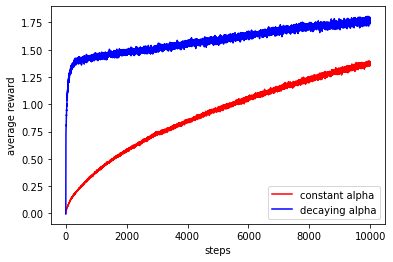

In [4]:
x = np.arange(num_steps)
y1 = rewards_const.mean(axis=0)
y2 = rewards_decaying.mean(axis=0)

plt.xlabel("steps")
plt.ylabel("average reward")
plt.plot(x,y1,'r', label="constant alpha")
plt.plot(x,y2,'b', label="decaying alpha")
plt.legend()
plt.show()

# constant does outperform eventually, but it takes a lot of steps

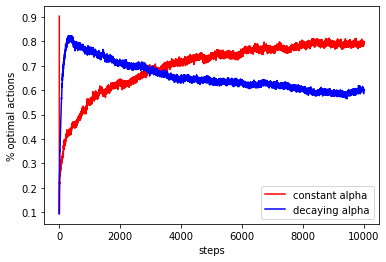

In [6]:
x = np.arange(num_steps)
y1 = optimal_actions_const.mean(axis=0)
y2 = optimal_actions_decaying.mean(axis=0)

plt.xlabel("steps")
plt.ylabel("% optimal actions")
plt.plot(x,y1,'r', label="constant alpha")
plt.plot(x,y2,'b', label="decaying alpha")
plt.legend()
plt.show()

# constant wins here, decaying fails to adapt